In [37]:
!pip install ucimlrepo
!pip install tensorflow

In [38]:
# Basic
import pandas as pd
import numpy as np
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [39]:
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo

# Ambil dataset dari UCI (ID: 697)
dataset = fetch_ucirepo(id=697)

# Data (X) dan target (y)
X = dataset.data.features
y = dataset.data.targets

df = pd.concat([X, y], axis=1)

# variable information
# print(df.variables)

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [40]:
#@title Cek missing value

# Missing values
df.isnull().sum()

# Duplicate data
print("Jumlah duplikasi:", df.duplicated().sum())
df = df.drop_duplicates()


Jumlah duplikasi: 0


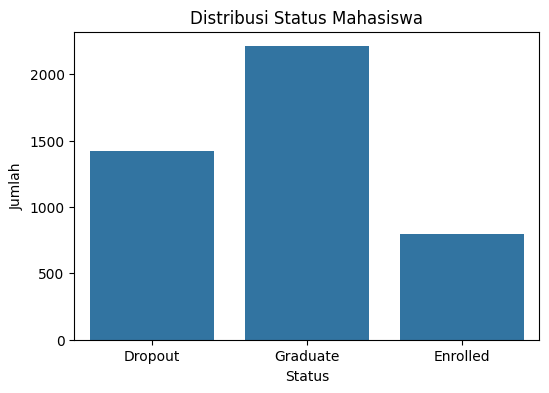

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x="Target", data=df)
plt.title("Distribusi Status Mahasiswa")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.show()


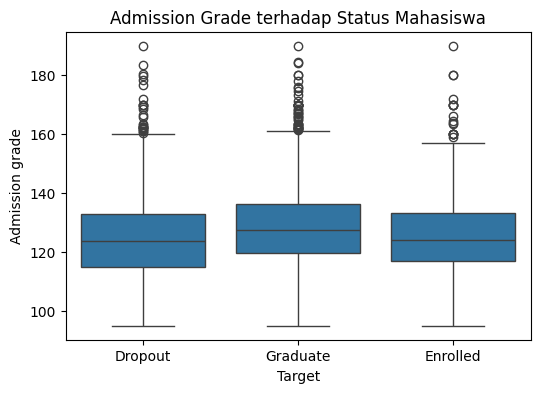

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Target", y="Admission grade", data=df)
plt.title("Admission Grade terhadap Status Mahasiswa")
plt.show()


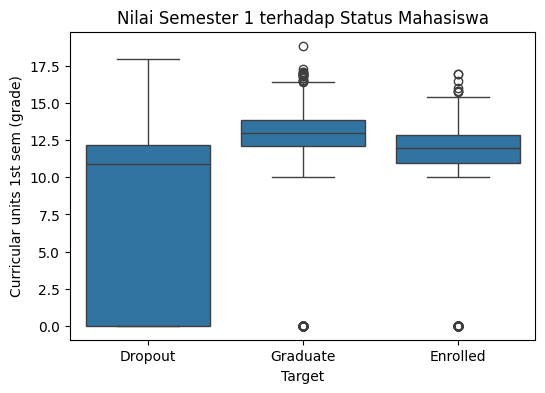

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="Target",
    y="Curricular units 1st sem (grade)",
    data=df
)
plt.title("Nilai Semester 1 terhadap Status Mahasiswa")
plt.show()


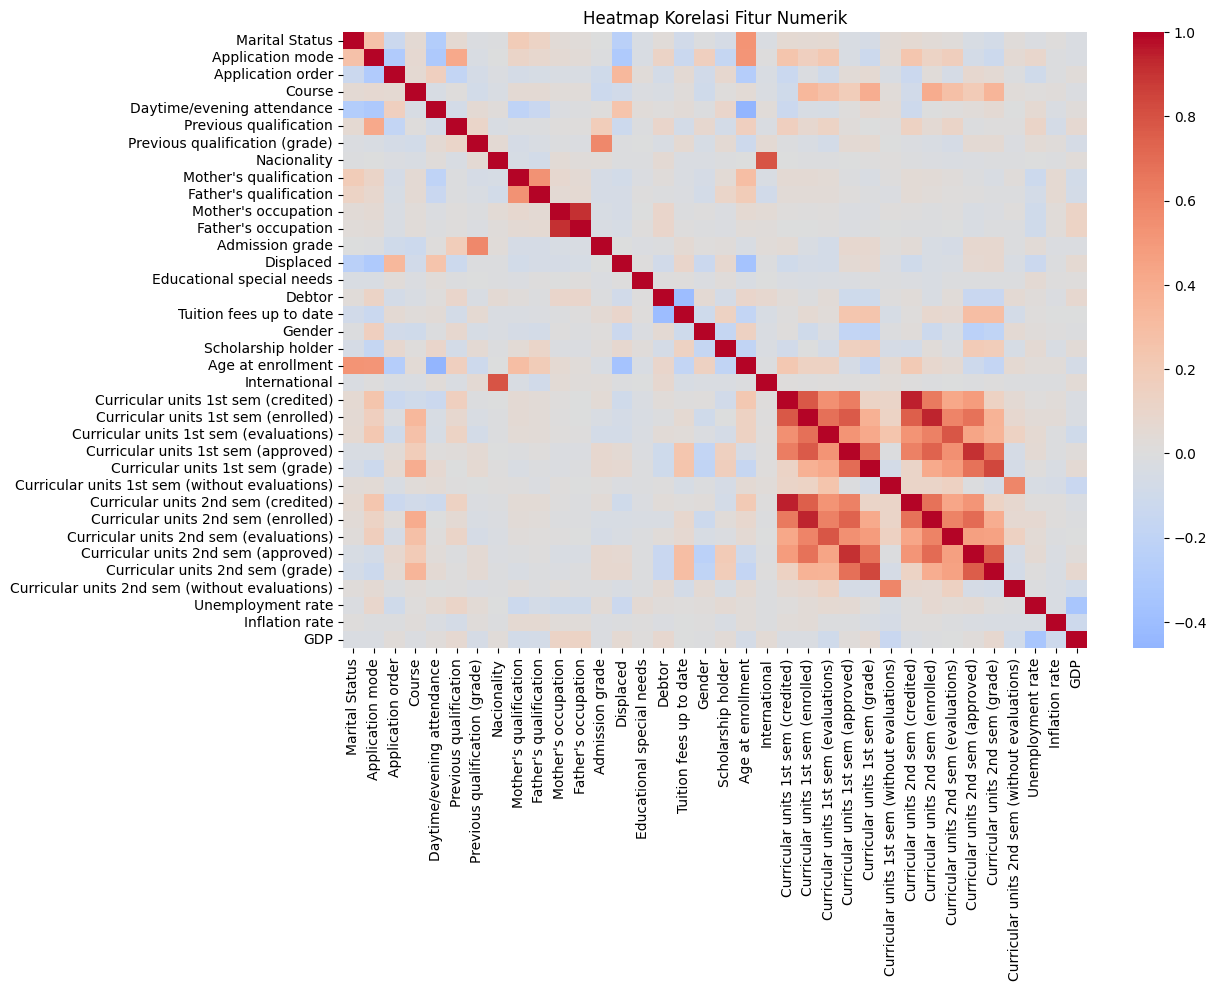

In [44]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


In [45]:
X = df.drop("Target", axis=1)
y = df["Target"]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [46]:
#@title Train test-split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [47]:
#@title Preprocessing Pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])


## Modeling

In [48]:
#@title Model 1: Baseline (Logistic Regression)

baseline_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base, average="weighted")

print("Baseline Accuracy:", acc_base)
print("Baseline F1:", f1_base)


Baseline Accuracy: 0.768361581920904
Baseline F1: 0.7531276658422533


In [49]:
#@title Model 2: Advanced ML (Random Forest)

rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print("RF Accuracy:", acc_rf)
print("RF F1:", f1_rf)


RF Accuracy: 0.7672316384180791
RF F1: 0.7514788189054367


In [50]:
#@title Preprocess for Deep Learning

X_train_dl = preprocessor.fit_transform(X_train)
X_test_dl = preprocessor.transform(X_test)

input_dim = X_train_dl.shape[1]
num_classes = len(np.unique(y))


In [51]:
#@title Model 3: Deep Learning (MLP)

dl_model = Sequential([
    Dense(128, activation="relu", input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

dl_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

dl_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,187 (51.51 KB)

 Trainable params: 13,187 (51.51 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
#@title Training Deep Learning

start_time = time.time()

history = dl_model.fit(
    X_train_dl,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

end_time = time.time()
print("Training time (seconds):", end_time - start_time)


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5550 - loss: 0.9982 - val_accuracy: 0.7472 - val_loss: 0.6480
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7212 - loss: 0.6894 - val_accuracy: 0.7754 - val_loss: 0.5931
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7475 - loss: 0.6427 - val_accuracy: 0.7797 - val_loss: 0.5836
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7542 - loss: 0.6195 - val_accuracy: 0.7768 - val_loss: 0.5818
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7613 - loss: 0.5999 - val_accuracy: 0.7698 - val_loss: 0.5776
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7615 - loss: 0.5756 - val_accuracy: 0.7768 - val_loss: 0.5731
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7608 - loss: 0.5812 - val_accuracy: 0.7782 - val_loss: 0.5689
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7658 - loss: 0.5816 - val_accuracy: 0.7797 - val

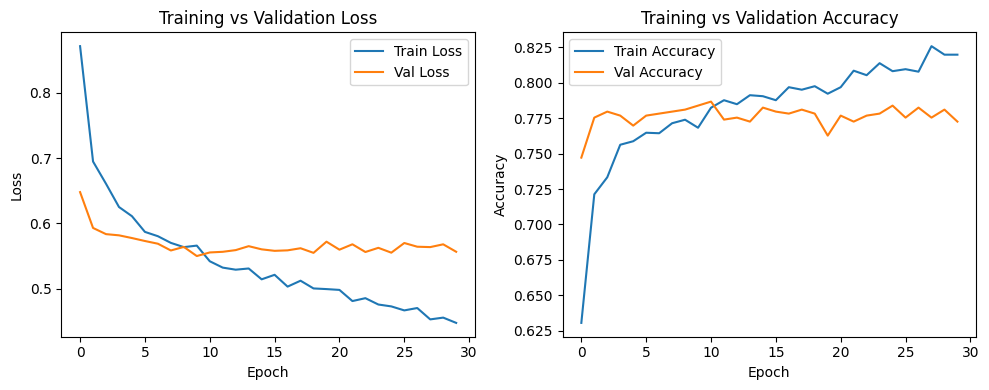

In [58]:
#@title Training History Visualization

plt.figure(figsize=(10,4))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
#@title Evaluasi Deep Learning (DL)

y_pred_dl = np.argmax(dl_model.predict(X_test_dl), axis=1)

acc_dl = accuracy_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl, average="weighted")

print("DL Accuracy:", acc_dl)
print("DL F1:", f1_dl)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
DL Accuracy: 0.7502824858757062
DL F1: 0.742938194574552


In [55]:
#@title Classification Report

print("Baseline:\n", classification_report(y_test, y_pred_base))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Deep Learning:\n", classification_report(y_test, y_pred_dl))


Baseline:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       284
           1       0.52      0.33      0.41       159
           2       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885

Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       284
           1       0.56      0.34      0.42       159
           2       0.79      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885

Deep Learning:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       284
           1       0.47      0.38      0.42       159
           2       0.79      0.8

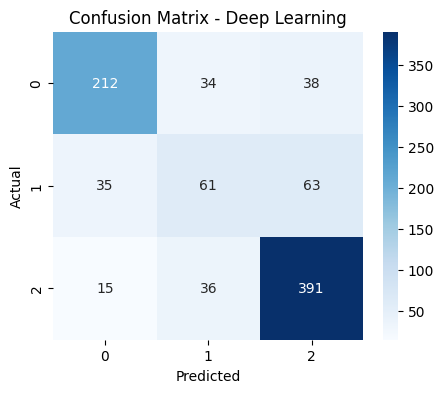

In [56]:
#@title Confusion Matrix (Deep Learning)

cm = confusion_matrix(y_test, y_pred_dl)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Deep Learning")
plt.show()


In [57]:
#@title Perbandingan Model

results = pd.DataFrame({
    "Model": ["Baseline", "Random Forest", "Deep Learning"],
    "Accuracy": [acc_base, acc_rf, acc_dl],
    "F1-Score": [f1_base, f1_rf, f1_dl]
})

results


,Model,Accuracy,F1-Score
0,Baseline,0.768362,0.753128
1,Random Forest,0.767232,0.751479
2,Deep Learning,0.750282,0.742938
